# Project Title: Trip Data Analysis
## Objective
We analyze trip data to understand patterns based on weekdays, hours, and months.  
The goal is to find when most trips occur and identify trends in usage.  

## Methodology
1. **Load the dataset**: We imported the necessary libraries and loaded the dataset.
2. **Exploratory Data Analysis (EDA)**:
   - Checked the structure of the dataset.
   - Used `.value_counts()` to analyze distributions.
3. **Data Visualization**:
   - Plotted **bar charts** for weekdays, hours, and months.
   - Used `seaborn` and `matplotlib` to visualize trends.

## Key Insights
- The busiest weekday for trips was Friday, while the least busy was Sunday.

- Most trips occurred between 5 PM - 7 PM, indicating peak commuting hours.

- Trips peaked in August and December, possibly due to holidays and vacations.

# 📌 Step 1: Load the Required Libraries
We need to import the necessary Python libraries for data analysis and visualization.  
- `pandas`: For handling and analyzing data.
- `matplotlib.pyplot` & `seaborn`: For visualizing trends  

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📌 Step 2: Load the Dataset
We will read the dataset into a DataFrame and check its first few rows using `.head()`.  
This helps us understand the structure of the data.


In [25]:
df = pd.read_csv("UberDataset.csv")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


# 📌 Step 3: Data Cleaning - Remove Last Rows & Convert Date
Before analysis, we:  
✅ Remove unnecessary rows at the end using `.iloc[]`  
✅ Convert the "Date" column to datetime format using `.to_datetime()`  
✅ Extract relevant date-related features (Year, Month, Day, Hour, Weekday)  
✅ Drop NaN values after transformation  

In [26]:
# Removing last row as it doesn't add up to ride
df = df[:-1].copy()

In [27]:
# convert to datetime
df["START_DATE"] = pd.to_datetime(df["START_DATE"],errors="coerce")
df["END_DATE"] = pd.to_datetime(df["END_DATE"],errors="coerce")

In [28]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,NaT,NaT,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,NaT,NaT,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,NaT,NaT,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,NaT,NaT,Business,Katunayake,Gampaha,6.4,Temporary Site


In [29]:
df = df.dropna(subset=["START_DATE","END_DATE"])
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,2016-12-12 13:32:00,Business,Cary,Cary,3.1,Errand/Supplies
1044,2016-12-12 13:36:00,2016-12-12 13:51:00,Business,Cary,Apex,4.4,Meal/Entertain
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Business,Apex,Cary,4.7,Customer Visit
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Business,Cary,Morrisville,3.0,Meal/Entertain


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420 entries, 0 to 1047
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  420 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    420 non-null    object        
 3   START       420 non-null    object        
 4   STOP        420 non-null    object        
 5   MILES       420 non-null    float64       
 6   PURPOSE     261 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 26.2+ KB


In [31]:
df = df.dropna(subset=["PURPOSE"])
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,2016-12-12 13:32:00,Business,Cary,Cary,3.1,Errand/Supplies
1044,2016-12-12 13:36:00,2016-12-12 13:51:00,Business,Cary,Apex,4.4,Meal/Entertain
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Business,Apex,Cary,4.7,Customer Visit
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Business,Cary,Morrisville,3.0,Meal/Entertain


In [32]:
df.shape

(261, 7)

In [42]:
df.loc[:,"Year"] = df["START_DATE"].dt.year
df.loc[:, "Month"] = df["START_DATE"].dt.month
df.loc[:, "Day"] = df["START_DATE"].dt.day
df.loc[:, "Hour"] = df["START_DATE"].dt.hour
df.loc[:, "Weekday"] = df["START_DATE"].dt.day_name()
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Year,Month,Day,Hour,Weekday
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016,1,1,21,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016,1,2,20,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016,1,5,17,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016,1,6,14,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016,1,6,17,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,2016-12-12 13:32:00,Business,Cary,Cary,3.1,Errand/Supplies,2016,12,12,13,Monday
1044,2016-12-12 13:36:00,2016-12-12 13:51:00,Business,Cary,Apex,4.4,Meal/Entertain,2016,12,12,13,Monday
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Business,Apex,Cary,4.7,Customer Visit,2016,12,12,14,Monday
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Business,Cary,Morrisville,3.0,Meal/Entertain,2016,12,12,17,Monday


In [43]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Year,Month,Day,Hour,Weekday
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016,1,1,21,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016,1,2,20,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016,1,5,17,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016,1,6,14,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016,1,6,17,Wednesday


# 📌 Step 4: Analyze the Number of Trips by Weekday, Hours and Month
We count the number of trips using `.value_counts()`.  
- This will help us understand which day has the most and least trips.
- This helps in identifying peak hours.
- Checking the number of trips per month helps us understand seasonal

In [35]:
df["Weekday"].value_counts()

Weekday
Friday       57
Monday       40
Thursday     37
Sunday       36
Tuesday      34
Wednesday    31
Saturday     26
Name: count, dtype: int64

In [36]:
df["Hour"].value_counts().head(10)

Hour
20    22
14    22
13    21
16    20
12    19
15    19
18    19
17    18
21    16
19    14
Name: count, dtype: int64

In [37]:
df["Month"].value_counts()

Month
6     41
12    37
2     35
3     30
5     25
1     22
4     22
7     22
11    20
8      5
10     2
Name: count, dtype: int64

# 📌 Step 5: Visualize Trips by Weekday, Hours and Months
We use a bar plot to visualize the number of trips 
- **X-axis**: Weekdays / Hours of the day / Month respectively.
- **Y-axis**: Number of trips  
- **Palette**: Cool-warm color scheme for better visualization  


In [38]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

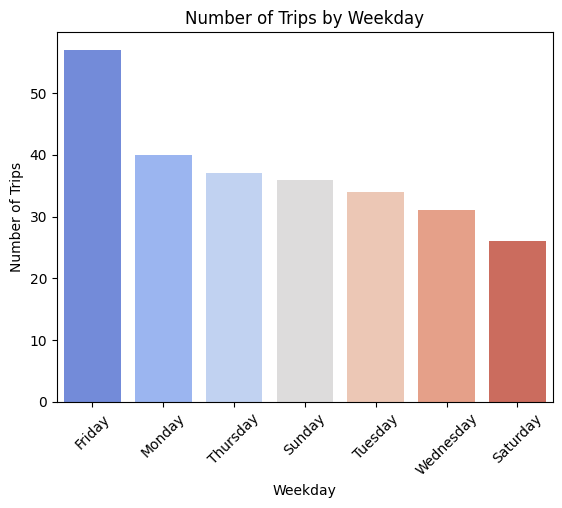

In [39]:
sns.barplot(
    x=df["Weekday"].value_counts().index, 
    y=df["Weekday"].value_counts().values, 
    hue=df["Weekday"].value_counts().index,  # Assign x to hue
    palette="coolwarm",
    legend=False  # Disable legend
)
plt.title("Number of Trips by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.show()


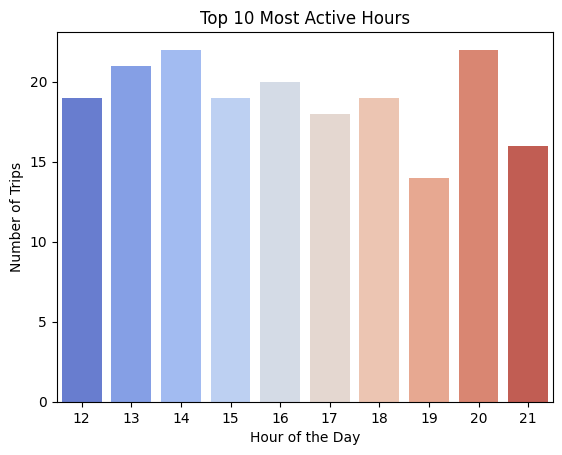

In [40]:
sns.barplot(
    x=df["Hour"].value_counts().head(10).index, 
    y=df["Hour"].value_counts().head(10).values, 
    palette="coolwarm"
)
plt.title("Top 10 Most Active Hours")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.show()

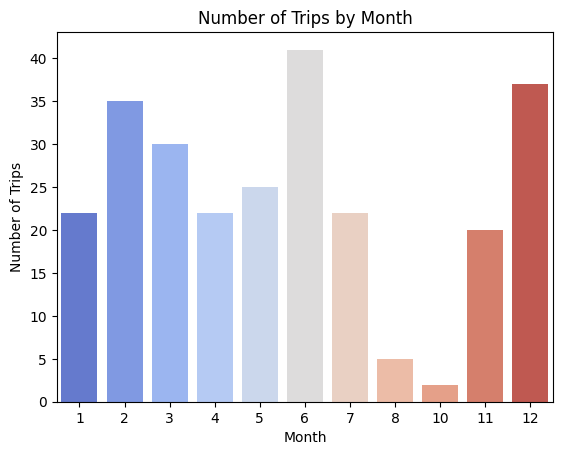

In [41]:
sns.barplot(
    x=df["Month"].value_counts().index, 
    y=df["Month"].value_counts().values, 
    palette="coolwarm"
)
plt.title("Number of Trips by Month")
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.show()

# 📌 Frequently Asked Questions (FAQ)

## ❓ Q1: Why did we remove the last few rows?
✅ Sometimes datasets include summary rows at the end, which are not useful for analysis.  
By removing them, we ensure the dataset only contains actual trip records.

## ❓ Q2: Why did we convert the 'Date' column to datetime?
✅ Converting the "Date" column to a proper datetime format allows us to extract useful time-based features like Year, Month, Day, and Hour.

## ❓ Q3: Why do we use `.dropna()`?
✅ After extracting new columns, some values may turn into `NaN` due to missing or corrupt data.  
Dropping them ensures our analysis is accurate.

## ❓ Q4: Why is it important to analyze data by hour?
✅ Understanding peak hours helps businesses manage demand, allocate resources efficiently, and optimize services.

## ❓ Q5: What can we do next with this dataset?
✅ We can:
- Add more features (e.g., public holidays, weather impact).
- Apply clustering techniques to identify trip patterns.
- Build a predictive model to forecast demand.